In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# defining the path
path = '/Users/shirwetelfeel/Desktop/untitled folder'

In [7]:
path_2 = '/Users/shirwetelfeel/Desktop/Data analysis /tasks/Data immersion/Achievment 4/14-02-2022 Instacart Basket Analysis'

In [8]:
# importing pickle file with most recent data
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '/Users/shirwetelfeel/Desktop/untitled folder/df_ords_prods_custmrs.pkl'))

In [9]:
#checking imported file 
df_ords_prods_cust.shape

(1198802, 33)

In [6]:
df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198802 entries, 0 to 1198801
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   order_id                999060 non-null   float32 
 1   user_id                 1198802 non-null  float32 
 2   eval_set                999060 non-null   object  
 3   order_number            999060 non-null   float32 
 4   order_dow               999060 non-null   float32 
 5   order_hour_of_day       999060 non-null   float32 
 6   days_since_prior_order  935521 non-null   float32 
 7   product_id              999060 non-null   float32 
 8   add_to_cart_order       999060 non-null   float32 
 9   reordered               999060 non-null   float32 
 10  product_name            999060 non-null   object  
 11  aisle_id                999060 non-null   float32 
 12  department_id           999060 non-null   float32 
 13  prices                  999060 non-null   

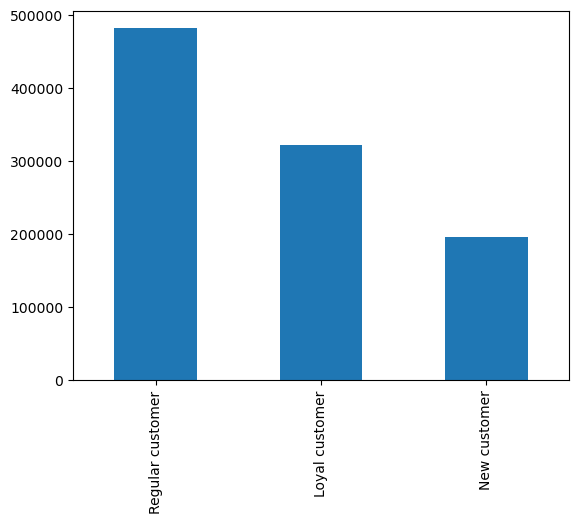

In [13]:
#Creating bar chart for customer loyalty
bar_loyalty = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

<AxesSubplot:>

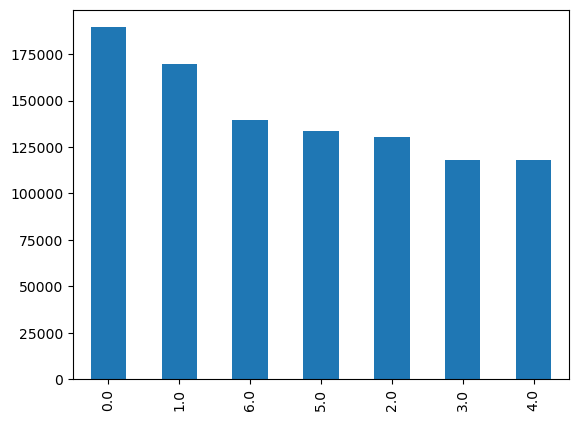

In [6]:
# creating  bar charts
df_ords_prods_cust['order_dow'].value_counts().plot.bar()

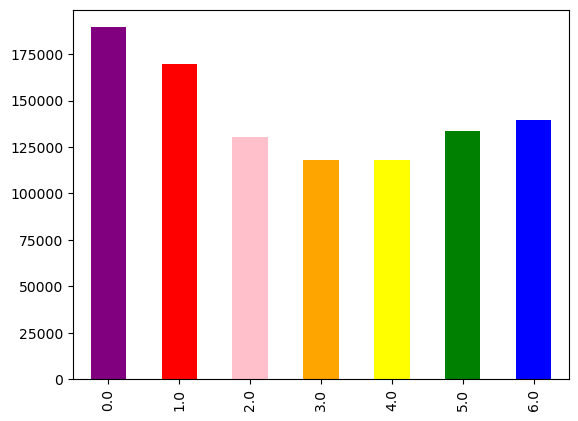

In [7]:
#sorting by dow (index)
barchart_order_dow = df_ords_prods_cust['order_dow'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

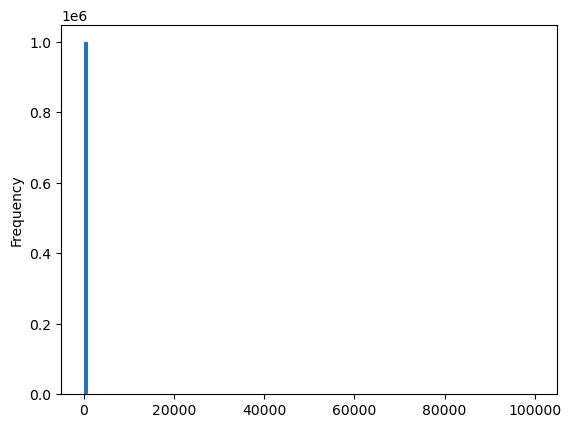

In [8]:
#creating histogram for prices
hist_prices = df_ords_prods_cust['prices'].plot.hist(bins = 100)

In [9]:
# fixing problem with the outliers
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] >100, 'prices'] = np.nan
df_ords_prods_cust['prices'].max()

25.0

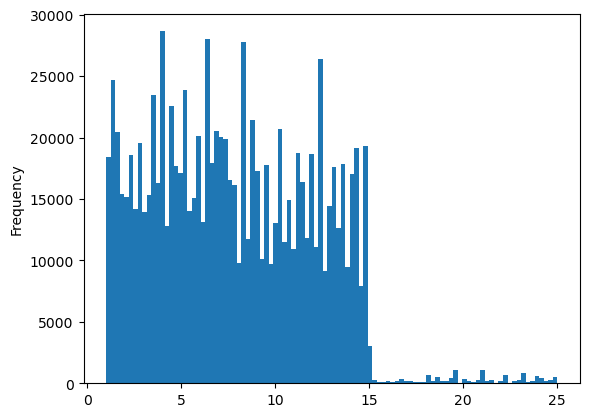

In [10]:
hist_prices = df_ords_prods_cust['prices'].plot.hist(bins = 100)

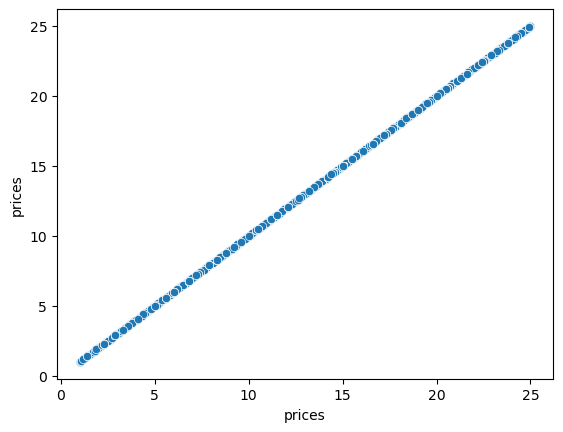

In [11]:
# creating scatterplot
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_cust)

In [13]:
### line chart, using a sample subset for the line chart.

In [15]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7
dev

array([False,  True, False, ...,  True,  True, False])

In [16]:
np.random.rand(10)

array([0.73748665, 0.89285277, 0.55990656, 0.75922906, 0.94102006,
       0.71809487, 0.63274055, 0.97303106, 0.48981174, 0.93505388])

In [18]:
big = df_ords_prods_cust[dev]
small = df_ords_prods_cust[~dev]

In [19]:
len(dev)

1198802

In [20]:
# checking if the sum of both creates same length
len(big) + len(small)

1198802

In [21]:
# creating a subset data frame for our line chart
df_small = small[['order_dow','prices']]

In [22]:
#checking if the data frame was created
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360093 entries, 0 to 1198801
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   order_dow  300484 non-null  float32
 1   prices     300441 non-null  float32
dtypes: float32(2)
memory usage: 5.5 MB


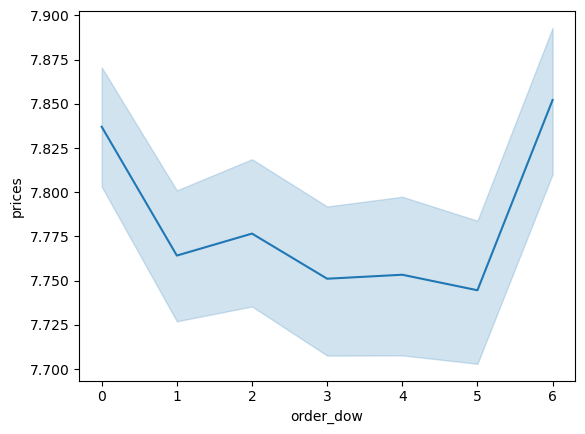

In [23]:
# creating a line chart
line_chart_dow_prices = sns.lineplot(data = df_small, x = 'order_dow',y = 'prices')

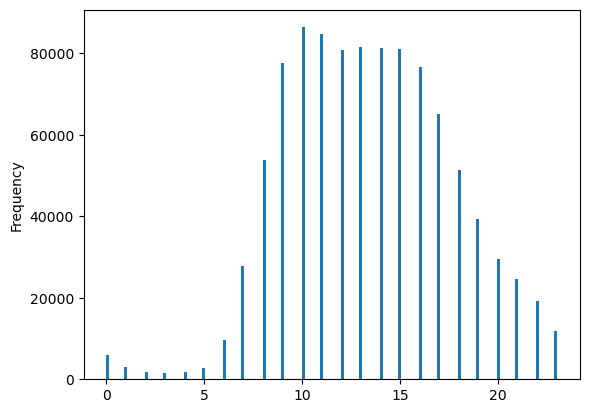

In [24]:
##Create a histogram of the “order_hour_of_day” column.
hist_order_hour_of_day = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 150)

In [26]:
###Histogram above shows us the frequency of orders per hour in the entire data frame.

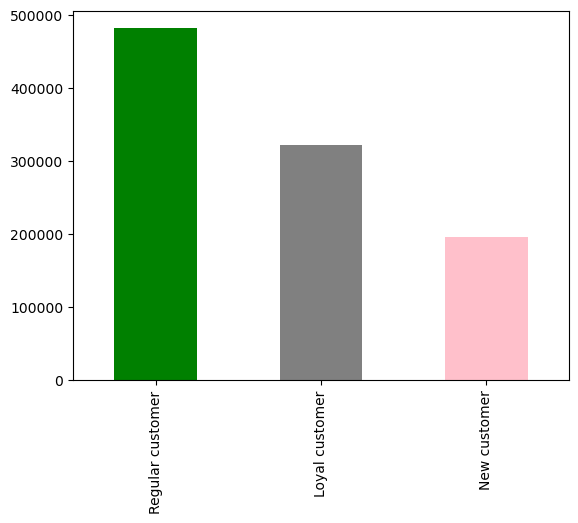

In [28]:
###Create a bar chart from the “loyalty_flag” column.
barchart_customer_loyalty = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color = ['green', 'grey', 'pink'])

In [29]:
## it shows the most customers are regular customers

In [30]:
##Check whether there’s a difference in expenditure

df_order_hour_of_day_prices = small[['order_hour_of_day','prices']]

In [31]:
#checking if df was created
df_order_hour_of_day_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360093 entries, 0 to 1198801
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_hour_of_day  300484 non-null  float32
 1   prices             300441 non-null  float32
dtypes: float32(2)
memory usage: 5.5 MB


In [32]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
0,8.0,9.0
2,12.0,9.0
3,7.0,9.0
6,9.0,9.0
10,8.0,12.5


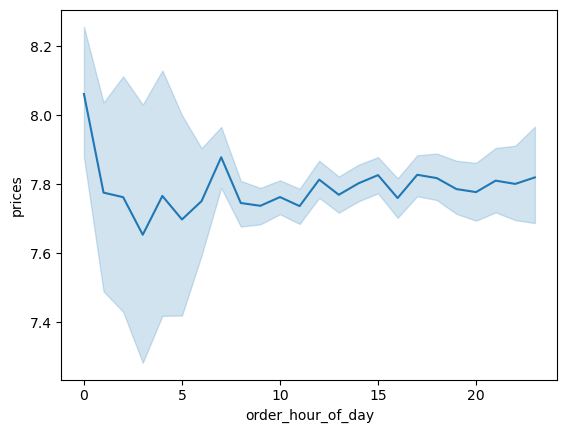

In [33]:
# creating a line chart of hour and prices
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices')

In [35]:
##determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents
#creating subset for the line chart 
df_age_dependants = small[['age','number_dependants']]

In [36]:
df_age_dependants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360093 entries, 0 to 1198801
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   age                360093 non-null  int8 
 1   number_dependants  360093 non-null  int32
dtypes: int32(1), int8(1)
memory usage: 4.5 MB


In [37]:
df_age_dependants.describe()

,age,number_dependants
count,360093.000000,360093.000000
mean,49.386964,1.517380
std,18.638935,1.114575
min,18.000000,0.000000
25%,33.000000,1.000000
50%,50.000000,2.000000
75%,66.000000,3.000000
max,81.000000,3.000000


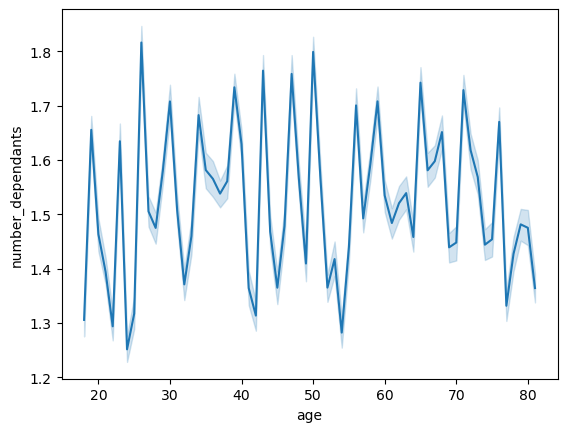

In [38]:
#creating line chart 
line_chart_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'number_dependants')

In [39]:
## it is not very clear to determine anything from this line chart

In [40]:
##You’ll also need to explore whether there’s a connection between age and spending power (income).
df_age_income = small[['age','income']]

In [41]:
# checking if the df was created
df_age_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360093 entries, 0 to 1198801
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   age     360093 non-null  int8 
 1   income  360093 non-null  int8 
dtypes: int8(2)
memory usage: 11.5 MB


In [42]:
df_age_income.describe()

,age,income
count,360093.000000,360093.000000
mean,49.386964,-1.096392
std,18.638935,73.494703
min,18.000000,-128.000000
25%,33.000000,-65.000000
50%,50.000000,-2.000000
75%,66.000000,62.000000
max,81.000000,127.000000


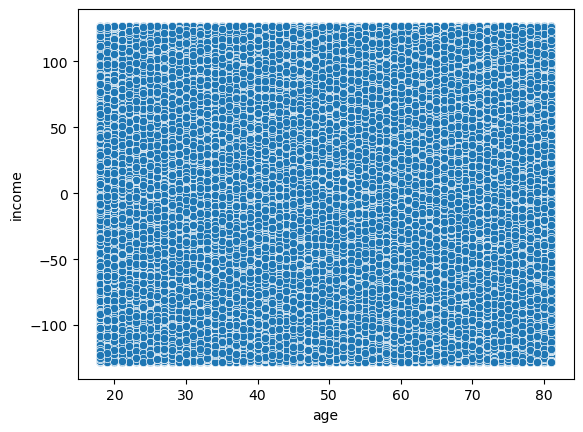

In [43]:
# creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

In [44]:
## it is not very clear from the above scatterplot.

In [47]:
barchart_order_dow.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'barchart_order_dow04.01.png'))

In [48]:
hist_prices.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'hist_prices04.01.png'))

In [49]:
scatterplot_prices.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'scatterplot_prices04.01.png'))

In [50]:
line_chart_dow_prices.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'line_chart_dow_prices04.01.png'))

In [51]:
hist_order_hour_of_day.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'hist_order_hour_of_day04.01.png'))

In [52]:
barchart_customer_loyalty.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'barchart_customer_loyalty04.01.png'))

In [53]:
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'line_chart_order_hour_of_day_prices04.01.png'))

In [54]:
line_chart_age_dependants.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'line_chart_age_dependants04.01.png'))

In [55]:
scatterplot_age_income.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'scatterplot_age_income04.01.png'))

In [14]:

bar_loyalty.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'barchart_loyalty.png'))